# mini EDA


## Librerias

In [5]:
pip install matplotlib 

  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp311-cp311-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.7 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 10.3 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seabron

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement seabron (from versions: none)
ERROR: No matching distribution found for seabron


In [3]:
!pip install numpy==1.23.5 scikit-learn==1.4.2

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Ruta del archivo CSV
ruta_csv = "SalesLT.csv"

# Cargar datos
df = pd.read_csv(ruta_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    847 non-null    int64 
 1   CustomerID    847 non-null    int64 
 2   NameStyle     847 non-null    bool  
 3   Title         840 non-null    object
 4   FirstName     847 non-null    object
 5   MiddleName    504 non-null    object
 6   LastName      847 non-null    object
 7   Suffix        48 non-null     object
 8   CompanyName   847 non-null    object
 9   SalesPerson   847 non-null    object
 10  EmailAddress  847 non-null    object
 11  Phone         847 non-null    object
 12  PasswordHash  847 non-null    object
 13  PasswordSalt  847 non-null    object
 14  rowguid       847 non-null    object
 15  ModifiedDate  847 non-null    object
dtypes: bool(1), int64(2), object(13)
memory usage: 100.2+ KB


In [6]:
df

,Unnamed: 0,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson,EmailAddress,Phone,PasswordHash,PasswordSalt,rowguid,ModifiedDate
0,0,1,False,Mr.,Orlando,N.,Gee,NaN,A Bike Store,adventure-works\pamela0,orlando0@adventure-works.com,245-555-0173,L/Rlwxzp4w7RWmEgXX+/A7cXaePEPcp+KwQhl2fJL7w=,1KjXYs4=,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2005-08-01 00:00:00.000
1,1,2,False,Mr.,Keith,NaN,Harris,NaN,Progressive Sports,adventure-works\david8,keith0@adventure-works.com,170-555-0127,YPdtRdvqeAhj6wyxEsFdshBDNXxkCXn+CRgbvJItknw=,fs1ZGhY=,E552F657-A9AF-4A7D-A645-C429D6E02491,2006-08-01 00:00:00.000
2,2,3,False,Ms.,Donna,F.,Carreras,NaN,Advanced Bike Components,adventure-works\jillian0,donna0@adventure-works.com,279-555-0130,LNoK27abGQo48gGue3EBV/UrlYSToV0/s87dCRV7uJk=,YTNH5Rw=,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2005-09-01 00:00:00.000
3,3,4,False,Ms.,Janet,M.,Gates,NaN,Modular Cycle Systems,adventure-works\jillian0,janet1@adventure-works.com,710-555-0173,ElzTpSNbUW1Ut+L5cWlfR7MF6nBZia8WpmGaQPjLOJA=,nm7D5e4=,FF862851-1DAA-4044-BE7C-3E85583C054D,2006-07-01 00:00:00.000
4,4,5,False,Mr.,Lucy,NaN,Harrington,NaN,Metropolitan Sports Supply,adventure-works\shu0,lucy0@adventure-works.com,828-555-0186,KJqV15wsX3PG8TS5GSddp6LFFVdd3CoRftZM/tP0+R4=,cNFKU4w=,83905BDC-6F5E-4F71-B162-C98DA069F38A,2006-09-01 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,842,30113,False,Mr.,Raja,D.,Venugopal,NaN,Nearby Cycle Shop,adventure-works\jae0,raja0@adventure-works.com,1 (11) 500 555-0195,lx5a4+AFGzH6mzjz6hpiR9scxbYGX8OcqFpv/cI6yFs=,hSwmBWk=,84975C44-DC82-49D3-BFC4-8F31B4C8E994,2006-09-01 00:00:00.000
843,843,30115,False,Ms.,Dora,P.,Verdad,NaN,Retreat Inn,adventure-works\josé1,dora0@adventure-works.com,155-555-0140,RgzxIE8hSY/z6iJnmDYMZWdJTQBRaWKI7UaZhAPhPxY=,jYD20wc=,E4CF8FD5-30A4-4B8E-8FD8-47032E255778,2006-08-01 00:00:00.000
844,844,30116,False,Ms.,Wanda,F.,Vernon,NaN,Technical Parts Manufacturing,adventure-works\shu0,wanda0@adventure-works.com,433-555-0168,hNQpZV8787KyeDWfllnZWzY+l8DFEYTnwoZZzYtusi0=,HDCU1Bk=,EC409609-D25D-41B8-9D15-A1AA6E89FC77,2007-07-01 00:00:00.000
845,845,30117,False,Mr.,Robert,R.,Vessa,NaN,Totes & Baskets Company,adventure-works\jillian0,robert13@adventure-works.com,560-555-0171,UWGC2U8F7AUNA2FuiT4agrBoxAFskHGQSxqP39B7zLQ=,iES3IZA=,6F08E2FB-1CD3-4F6E-A2E6-385669598B19,2005-08-01 00:00:00.000


## comentarios mini EDA

Podemos Ver que en CompanyName y SalesPerson, no tienen datos nulos y dentros del analisis que realice en un excel para la visualizacion de categorias diferentes, dichas variables en especial Sales Person, son las que menos complejidad a nivel de ser una variable tipo objeto en cuestion de Identificacion o descripcion de la identificacion como nombre, titulo, etc parece tener, ya que no es info que realmente nos sirva o sea relevante en un ML pero si en un identificador.

Anteriormente en el mismo excel preprocese el codigo realizando un valor acumulado

In [7]:
# Variables predictoras y objetivo
X = df[['SalesPerson', 'CompanyName']]
y = df['ValorAcumulado']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['SalesPerson', 'CompanyName'])
    ])

# Pipeline con modelo de regresión
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar modelo
model.fit(X_train, y_train)

KeyError: 'ValorAcumulado'

Utilice un pequeño one hot enconding en las variables categoricas para la discretizacion de las mismas y que sea digerible para el modelo en las entradas que tendra, recordemos que la predicha sera el valor acumulado, un factor de deltas que surge del ordenamiento previo en orden ascendente donde Valor acumulado es la diferencia del valor previo al actual, siendo de 1

Mean Squared Error (MSE): 114517.14
Mean Absolute Error (MAE): 303.59
R² Score: -0.94


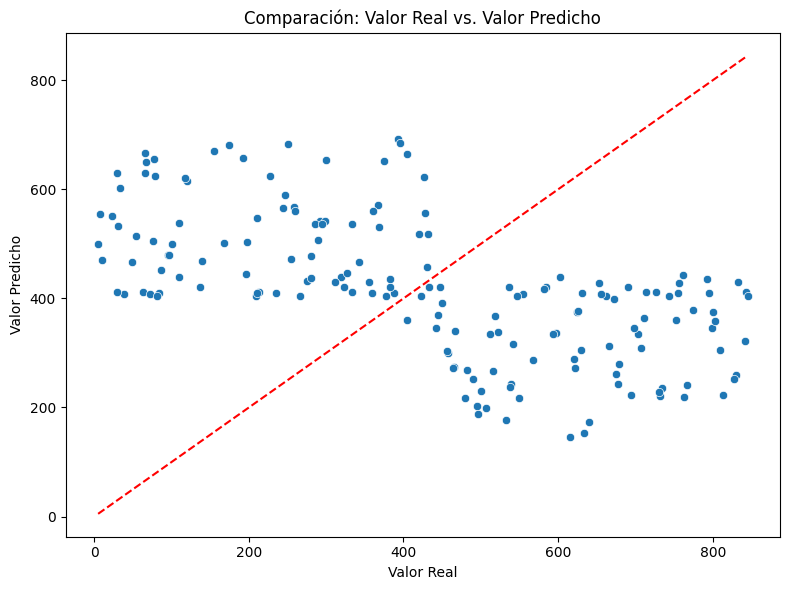

In [16]:
# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Gráfica de valores reales vs predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Comparación: Valor Real vs. Valor Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # línea ideal
plt.tight_layout()
plt.show()

## Conclusion a traves de la prediccion de ValorAcumulado

Al parecer modelos como Random Forest e incluso se probo XGboost en pruebas experimentales no se comporta bien con el entrenamiento del modelo de Valor acumulado a traves de las entradas, por lo que se cambiara el enfoque a una prediccion datetime, del mismo ModifiedDate en timestamp, sin la inclusion de Valor acumulado en entrenamiento pues daria contexto de la variable predictora casi al 100%, por lo que se excluye

## Nuevo Intento

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSV
ruta_csv = "SalesLT.csv"
df = pd.read_csv(ruta_csv)

df = df.drop("Unnamed: 0", axis=1)
# Convertir a datetime
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'], errors='coerce')
df



,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson,EmailAddress,Phone,PasswordHash,PasswordSalt,rowguid,ModifiedDate
0,1,False,Mr.,Orlando,N.,Gee,NaN,A Bike Store,adventure-works\pamela0,orlando0@adventure-works.com,245-555-0173,L/Rlwxzp4w7RWmEgXX+/A7cXaePEPcp+KwQhl2fJL7w=,1KjXYs4=,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2005-08-01
1,2,False,Mr.,Keith,NaN,Harris,NaN,Progressive Sports,adventure-works\david8,keith0@adventure-works.com,170-555-0127,YPdtRdvqeAhj6wyxEsFdshBDNXxkCXn+CRgbvJItknw=,fs1ZGhY=,E552F657-A9AF-4A7D-A645-C429D6E02491,2006-08-01
2,3,False,Ms.,Donna,F.,Carreras,NaN,Advanced Bike Components,adventure-works\jillian0,donna0@adventure-works.com,279-555-0130,LNoK27abGQo48gGue3EBV/UrlYSToV0/s87dCRV7uJk=,YTNH5Rw=,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2005-09-01
3,4,False,Ms.,Janet,M.,Gates,NaN,Modular Cycle Systems,adventure-works\jillian0,janet1@adventure-works.com,710-555-0173,ElzTpSNbUW1Ut+L5cWlfR7MF6nBZia8WpmGaQPjLOJA=,nm7D5e4=,FF862851-1DAA-4044-BE7C-3E85583C054D,2006-07-01
4,5,False,Mr.,Lucy,NaN,Harrington,NaN,Metropolitan Sports Supply,adventure-works\shu0,lucy0@adventure-works.com,828-555-0186,KJqV15wsX3PG8TS5GSddp6LFFVdd3CoRftZM/tP0+R4=,cNFKU4w=,83905BDC-6F5E-4F71-B162-C98DA069F38A,2006-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,30113,False,Mr.,Raja,D.,Venugopal,NaN,Nearby Cycle Shop,adventure-works\jae0,raja0@adventure-works.com,1 (11) 500 555-0195,lx5a4+AFGzH6mzjz6hpiR9scxbYGX8OcqFpv/cI6yFs=,hSwmBWk=,84975C44-DC82-49D3-BFC4-8F31B4C8E994,2006-09-01
843,30115,False,Ms.,Dora,P.,Verdad,NaN,Retreat Inn,adventure-works\josé1,dora0@adventure-works.com,155-555-0140,RgzxIE8hSY/z6iJnmDYMZWdJTQBRaWKI7UaZhAPhPxY=,jYD20wc=,E4CF8FD5-30A4-4B8E-8FD8-47032E255778,2006-08-01
844,30116,False,Ms.,Wanda,F.,Vernon,NaN,Technical Parts Manufacturing,adventure-works\shu0,wanda0@adventure-works.com,433-555-0168,hNQpZV8787KyeDWfllnZWzY+l8DFEYTnwoZZzYtusi0=,HDCU1Bk=,EC409609-D25D-41B8-9D15-A1AA6E89FC77,2007-07-01
845,30117,False,Mr.,Robert,R.,Vessa,NaN,Totes & Baskets Company,adventure-works\jillian0,robert13@adventure-works.com,560-555-0171,UWGC2U8F7AUNA2FuiT4agrBoxAFskHGQSxqP39B7zLQ=,iES3IZA=,6F08E2FB-1CD3-4F6E-A2E6-385669598B19,2005-08-01


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    847 non-null    int64         
 1   NameStyle     847 non-null    bool          
 2   Title         840 non-null    object        
 3   FirstName     847 non-null    object        
 4   MiddleName    504 non-null    object        
 5   LastName      847 non-null    object        
 6   Suffix        48 non-null     object        
 7   CompanyName   847 non-null    object        
 8   SalesPerson   847 non-null    object        
 9   EmailAddress  847 non-null    object        
 10  Phone         847 non-null    object        
 11  PasswordHash  847 non-null    object        
 12  PasswordSalt  847 non-null    object        
 13  rowguid       847 non-null    object        
 14  ModifiedDate  847 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1),

Se decidio por incluir todas las entradas posibles aunque de manera logica no fueran relevantes para el entrenamiento excluyendo todas las columnas faltantes lo que si bien parece contraintuitivo, quisiera ver como se comporta, asi como una conversion a timestamp

## Preprocesamiento

-borrado de nans

-modified date a timestamp

-categoricas con one hot encoding


In [17]:

# Eliminar filas con cualquier valor nulo
df = df.dropna()

# Excluir columnas irrelevantes
columnas_excluir = ['ModifiedDate']
X = df.drop(columns=columnas_excluir)

# Variable objetivo como timestamp
y = df['ModifiedDate'].astype('int64') // 10**9

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 9 to 838
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    48 non-null     int64         
 1   NameStyle     48 non-null     bool          
 2   Title         48 non-null     object        
 3   FirstName     48 non-null     object        
 4   MiddleName    48 non-null     object        
 5   LastName      48 non-null     object        
 6   Suffix        48 non-null     object        
 7   CompanyName   48 non-null     object        
 8   SalesPerson   48 non-null     object        
 9   EmailAddress  48 non-null     object        
 10  Phone         48 non-null     object        
 11  PasswordHash  48 non-null     object        
 12  PasswordSalt  48 non-null     object        
 13  rowguid       48 non-null     object        
 14  ModifiedDate  48 non-null     datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1), objec

In [19]:
# Columnas categóricas
columnas_categoricas = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Hacemos un pequeño one hot encoding con las variables de entrada para probarse con los 3 modelos: Regresion Lineal, RF y Xgboost

In [20]:
# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)
    ],
    remainder='passthrough'
)

# Diccionario de modelos
modelos = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# Guardar el modelo entrenado en un archivo .pkl
with open("RandomForest_BestModel.pkl", "wb") as f:
    pickle.dump(rf_pipeline, f)


 Modelo: Linear Regression
 MSE (timestamp): 283678466240356.88
 MAE (timestamp): 9043227.01 → ~104.67 días
  R²:   -0.0100


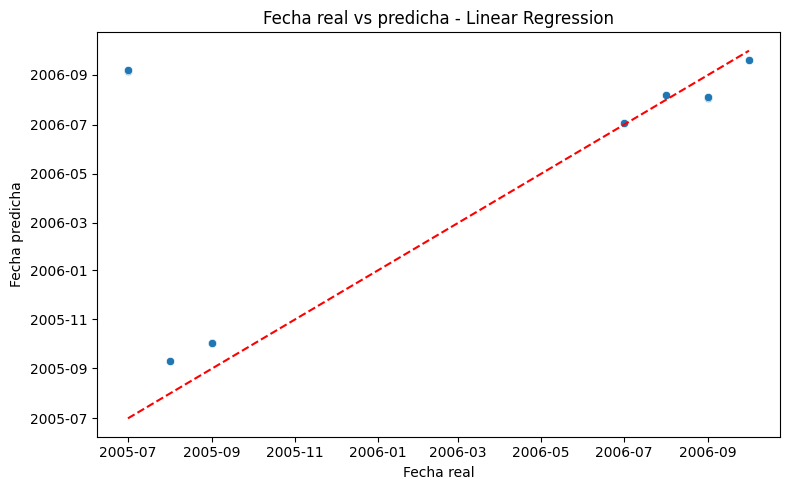


 Modelo: Random Forest
 MSE (timestamp): 304857982681804.81
 MAE (timestamp): 12780892.80 → ~147.93 días
  R²:   -0.0854


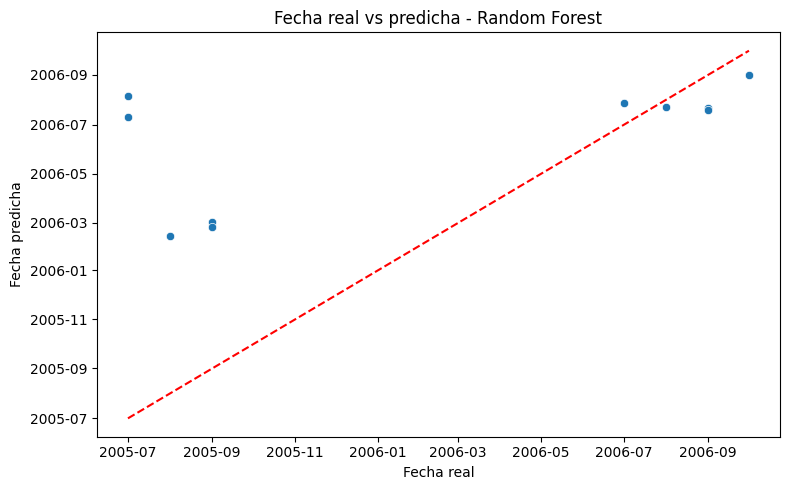

In [21]:

# Entrenamiento y evaluación
for nombre, modelo in modelos.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', modelo)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Reconversión a fechas
    y_test_datetime = pd.to_datetime(y_test, unit='s')
    y_pred_datetime = pd.to_datetime(y_pred, unit='s')

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n Modelo: {nombre}")
    print(f" MSE (timestamp): {mse:.2f}")
    print(f" MAE (timestamp): {mae:.2f} → ~{mae / 86400:.2f} días")
    print(f"  R²:   {r2:.4f}")
    
    # Gráfica fechas reales vs predichas
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=y_test_datetime, y=y_pred_datetime)
    plt.plot([y_test_datetime.min(), y_test_datetime.max()],
             [y_test_datetime.min(), y_test_datetime.max()], 'r--')
    plt.title(f"Fecha real vs predicha - {nombre}")
    plt.xlabel("Fecha real")
    plt.ylabel("Fecha predicha")
    plt.tight_layout()
    plt.show()


## Conclusion y exportacion del modelo

Como podemos ver obtenemos resultados muy buenos con los modelos de tipo ensambladosm, RF, y Xgboost acercandose muy cercano a la  linea real de prediccion, tener en cuenta que son muchos menos datos de los originales aunque contrauitivo, parece funcionar mucho mejor, por lo que dado su error de solo 13.45 dias con un r^2 de 99.6% nos quedaremos con el modelo de random forest

In [22]:
import pickle

# Crear pipeline con Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
rf_pipeline.fit(X_train, y_train)

# Guardar el modelo entrenado en un archivo .pkl
with open("RandomForest_BestModel.pkl", "wb") as f:
    pickle.dump(rf_pipeline, f)

print("✅ Modelo Random Forest exportado como 'RandomForest_BestModel.pkl'")


✅ Modelo Random Forest exportado como 'RandomForest_BestModel.pkl'
